# Image Detection using Tensorflow Hub and OpenCV

## TensorFlow Hub:
TensorFlow Hub is an open repository and library for reusable machine learning. The tfhub.dev repository provides many pre-trained models: text embeddings, image classification models, TF.js/TFLite models and much more. The repository is open to community contributors.
https://www.tensorflow.org/hub/overview

In [2]:
import tensorflow_hub as hub
import cv2
import numpy
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
# Apply image detector on a batch of image using hub.load
detector = hub.load("https://tfhub.dev/tensorflow/efficientdet/lite2/detection/1")
detector

<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject at 0x1f5227d3f10>

In [51]:
width = 1028
height = 1028

#Load image by Opencv2
img = cv2.imread('kitchen.jpg')
#Resize to respect the input_shape
inp = cv2.resize(img, (width , height ))

#Convert img to RGB
rgb = cv2.cvtColor(inp, cv2.COLOR_BGR2RGB)

#Is optional but i recommend (float convertion and convert img to tensor image)
rgb_tensor = tf.convert_to_tensor(rgb, dtype=tf.uint8)

#Add dims to rgb_tensor
rgb_tensor = tf.expand_dims(rgb_tensor , 0)




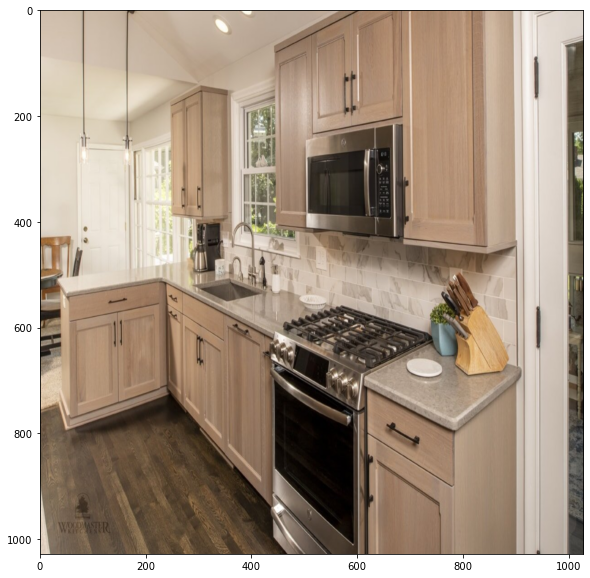

In [52]:
plt.figure(figsize=(10,10))
plt.imshow(rgb)

In [53]:
boxes, scores, classes, num_detections = detector(rgb_tensor)

In [54]:
labels = pd.read_csv('labels.csv',sep=';',index_col='ID')
labels = labels[('OBJECT 1')]

In [55]:
labels.head()

ID
1        person
2       bicycle
3           car
4    motorcycle
5      airplane
Name: OBJECT 1, dtype: object

In [56]:
pred_labels = classes.numpy().astype('int')[0] 
pred_labels = [labels[i] for i in pred_labels]
pred_boxes = boxes.numpy()[0].astype('int')
pred_scores = scores.numpy()[0]

In [63]:
for score, (ymin,xmin,ymax,xmax), label in zip(pred_scores, pred_boxes, pred_labels):
        if score < 0.5:
            continue
            
        score_txt = f'{100 * round(score)}%'
        img_boxes = cv2.rectangle(rgb,(xmin, ymax),(xmax, ymin),(0,0,255),2)      
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img_boxes, label,(xmin, ymax-10), font, 1.5, (0,255,0), 2, cv2.LINE_AA)
        cv2.putText(img_boxes,score_txt,(xmax, ymax-10), font, 1.0, (255,0,0), 2, cv2.LINE_AA)


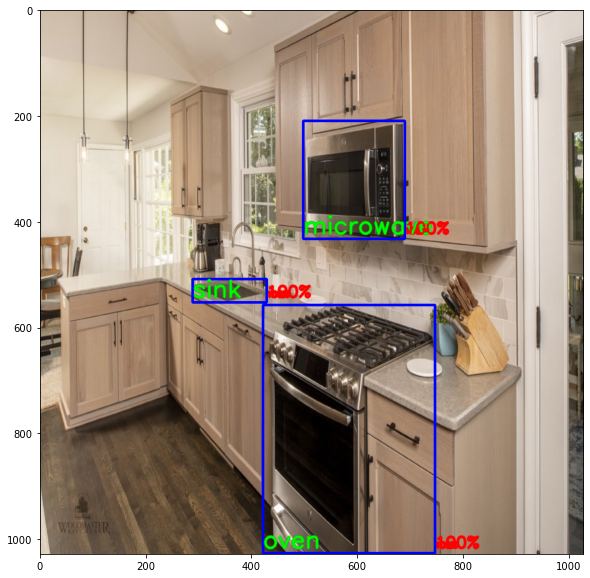

In [64]:
plt.figure(figsize=(10,10))
plt.imshow(img_boxes)

plt.savefig('image_pred.jpg',transparent=True, )